# <font color = "teal">Housing Data Analysis</font>

## Read the Dataset and all the required libraries

In [27]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('housetrain.csv')


# <font color = "cyan">Data Preprocessing</font>

In [7]:
print(df.shape)
print(df.head(3))


(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]


In [15]:
df.isnull().sum().sort_values(ascending =False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [16]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
# find interesting attributes and subset the data based on these attributes
interesting  = ['RoofStyle','HouseStyle','OverallCond', 'YearBuilt', 
                'YearRemodAdd','FullBath','Heating','Fireplaces','GarageArea',
                'PoolArea','SaleCondition', 'SalePrice']
new_df = df[interesting]
new_df.head()

,RoofStyle,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,FullBath,Heating,Fireplaces,GarageArea,PoolArea,SaleCondition,SalePrice
0,Gable,2Story,5,2003,2003,2,GasA,0,548,0,Normal,208500
1,Gable,1Story,8,1976,1976,2,GasA,1,460,0,Normal,181500
2,Gable,2Story,5,2001,2002,2,GasA,1,608,0,Normal,223500
3,Gable,2Story,5,1915,1970,1,GasA,1,642,0,Abnorml,140000
4,Gable,2Story,5,2000,2000,2,GasA,1,836,0,Normal,250000


In [21]:
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OverallCond,1460.0,5.575342,1.112799,1.0,5.0,5.0,6.0,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.0,1994.0,2004.0,2010.0
FullBath,1460.0,1.565068,0.550916,0.0,1.0,2.0,2.0,3.0
Fireplaces,1460.0,0.613014,0.644666,0.0,0.0,1.0,1.0,3.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.5,480.0,576.0,1418.0
PoolArea,1460.0,2.758904,40.177307,0.0,0.0,0.0,0.0,738.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


In [23]:
new_df.isnull().sum()

RoofStyle        0
HouseStyle       0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
FullBath         0
Heating          0
Fireplaces       0
GarageArea       0
PoolArea         0
SaleCondition    0
SalePrice        0
dtype: int64

# <font color = "darkgreen">Data Visualization</font>

In [25]:
new_df.head()

,RoofStyle,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,FullBath,Heating,Fireplaces,GarageArea,PoolArea,SaleCondition,SalePrice
0,Gable,2Story,5,2003,2003,2,GasA,0,548,0,Normal,208500
1,Gable,1Story,8,1976,1976,2,GasA,1,460,0,Normal,181500
2,Gable,2Story,5,2001,2002,2,GasA,1,608,0,Normal,223500
3,Gable,2Story,5,1915,1970,1,GasA,1,642,0,Abnorml,140000
4,Gable,2Story,5,2000,2000,2,GasA,1,836,0,Normal,250000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF3FE12710>,
      dtype=object)

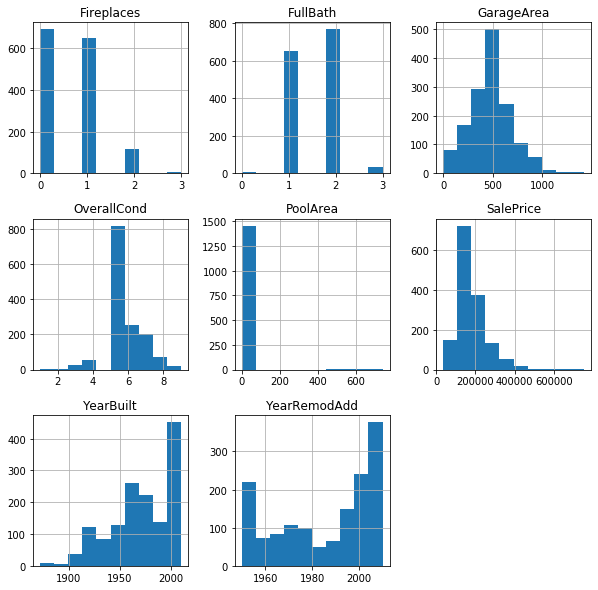

In [31]:
# it would be nice to see the distribution of the numeric variables
new_df.select_dtypes(include = [np.number]).hist(figsize = (10,10))

# From the histograms we can conclude the following:
* there are four types of fireplaces with reducing frequency in the data
* Option 1 and 2 are the most popular baths
* The garage area ranges between 0 and 1000 square ft ( normally distributed) with a mean of roughly 500
* most of the houses in the dataset have above average quality  (5>)
* The pool area is either low or high, suggesting standard builds for the pools
* the sale prices are normally distributed with a slight skew towards lower prices
* Most of the houses were built after 1950s with alot of them built after 2000s, therefore the houses are relatively new
* The houses in the dataset have been remodelled quite recently( after 1980)

AxesSubplot(0.135,0.125;0.755x0.755)


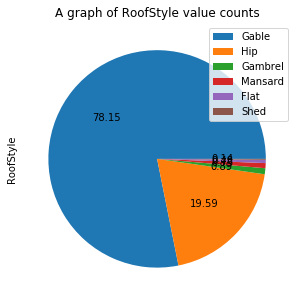

AxesSubplot(0.135,0.125;0.755x0.755)


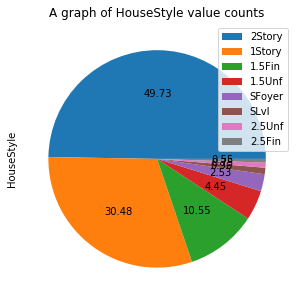

AxesSubplot(0.135,0.125;0.755x0.755)


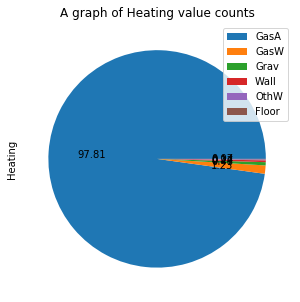

AxesSubplot(0.135,0.125;0.755x0.755)


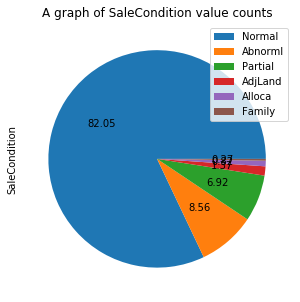

In [65]:
# we see the value counts of all the non numeric variables
for i  in new_df.columns[new_df.dtypes == "object"]:
    plt.figure(figsize =(5,5))
    plt.title("A graph of {} value counts".format(i))
    print(new_df[i].value_counts().plot(kind = "pie", autopct='%.2f',labels = [""] * len(list(new_df[i].unique()))))
    plt.legend(labels =new_df[i].unique() )
    plt.show()
    #x = pd.DataFrame(new_df[i].value_counts(),columns = ["Index","cols"])
    #plt.pie(x.cols)
    #plt.show()
    
    

# Takes from the value counts

* Gable is the most common  Roof style ( at 78% ) followed by Hip at  19% with the flat being last
* Most of the houses are two storey followed by 1 story houses, the least common is the 2.5 fin
* Almost all the houses are heated by Gas
* 82 % of the houses were sold under "normal" sale condition

In [ ]:
new_df.to_csv("cl")